# Методы оптимизации в нейронных сетях

Обучая нейронную сеть, на самом деле, мы **решаем задачу оптимизации**: ищем такие аргументы (параметры или веса) нейронной сети, которые минимизируют выбранную функцию ошибки.

Формализуем задачу: 
* Дано $N$ объектов $x_i$ ($|X| = N$) с ответами $y_i$
* Объекты описаны векторами вещественных чисел: $x_i = (x_1, x_2, ..., x_d) \in R^d$
* Решающий алгоритм $a(x, \theta)$ - многослойная нейронная сеть с K слоями
* Каждый слой имеет свои параметры $\theta_k$ - веса и смещения:
    * Веса $W$ - матрица, размерность которой количество входов на количество выходов
    * Смещения $b$ - вектор, размерности выходов

> Чтобы посчитать количество оптимизируемых параметров $\theta$ полносвязной нейронной сети для всех слоев $K$ складываем $\text{dim}(W) + \text{dim}(b)$

Именно эти параметры мы должны оптимизировать так, чтобы наш алгоритм наилучшим образом решал поставленную задачу. Для этого, в зависимости от решаемой задачи, мы подбираем функцию ошибки $\mathcal{L}(a(x_i, \theta), y_i)$ и решаем задачу оптимизации:

$$Q(\theta) = Q(\theta_1, \theta_2, ..., \theta_N) = \sum\limits_{i=1}^N \mathcal{L}(a(x_i, \theta), y_i) \rightarrow \min_\theta$$

$$\theta = \mathrm{argmin}_\theta Q(\theta_1, \theta_2, ..., \theta_N)$$

Как можно видеть, оптимизируемая функция является сложной (композицией других функций), не задана в явном виде, более того, она может не быть выпуклой (в отличае от задачи оптимизации весов перцептрона).

Существуют разные методы оптимизации, которые могут решить поставленную задачу (случайный перебор, метод отжига), однако, наибольшей популярностью пользуется **градиентный спуск** и его вариации.

## Идея метода градиентного спуска

Суть работы градиентного спуска часто передают при помощи примера с человеком, который шагает вниз по склону холма. В этом примере холм состоит из значений функции ошибки от весов модели (такая вот трехмерная поверхность функции от двух аргументов), человек - текущее значение параметров, а то, куда он направляется - минимум функции ошибки.

Прийти в этот минимум достаточно легко: нужно итеративно двигаться в сторону антиградиента функции ошибки, поскольку он указывает в направлении наискорейшего убывания функции:

$$
-\nabla_{\theta} Q=-\left[\begin{array}{c}
\dfrac{\partial Q}{\partial \theta_1}\\
\dfrac{\partial Q}{\partial \theta_2}\\
\vdots \\
\dfrac{\partial Q}{\partial \theta_n}
\end{array}\right]
$$

Тогда мы можем описать идею метода градиентного спуска как последовательность шагов:
1. Инициализация весов $\theta$: $W^{(0)}, b^{(0)}$
2. Обновление весов $\theta$ на шаге $i + 1$:
    * $W^{(i+1)} = W^{(i)} - \eta \frac{\partial Q}{\partial W}$
    * $b^{(i+1)} = b^{(i)} - \eta \frac{\partial Q}{\partial b}$

В общем виде шаг градиентного спуска можно записать:

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla_\theta Q(\theta^{(i)}) = \theta^{(i)} - \eta \sum_{(x, y)} \nabla_\theta \mathcal{L}(a(x, \theta^{(i)}), y)$$

$\eta$ - learning rate, параметр градиентного спуска, который регулиует размер шага, который делает алгоритм в сторону антиградиента.

Вычисления остановятся тогда, когда мы выполним заданное количество шагов или при срабатывании некоторого критерия остановки. Сложность задачи заключается в том, что функция потерь может иметь значительное число локальных минимумов.

## Вычисление производной по всем параметрам

[Computing Neural Network Gradients](https://web.stanford.edu/class/cs224n/readings/gradient-notes.pdf)

Для того, чтобы осуществить градиентный спуск, нам нужно знать производную функции потерь по всем параметрам нейронной сети: 

$$\frac{\partial Q}{\partial \theta_i}$$

Однако, наша оптимизируемая функция является сложной функцией, то есть функцией от функций (композицией функций). Например, пусть $Q(\theta) = f(g(\theta))$. Тогда ее производную будем выичислять по правилу вычисления производной сложной функции ([chain rule](https://en.wikipedia.org/wiki/Chain_rule)):

$$(f(g(\theta)))' = f'(g(\theta)) \cdot g'(\theta)$$

Сложные функции можно визуализировать в виде **графа вычислений**. Его узлами являются функции, а ребрами - их аргументы. [Хороший пример здесь.](https://stepik.org/lesson/210594/step/6?unit=184089)

В нашем случае $f$, $g$, $\theta$ - векторные величины, тогда $f = f(g_1(\theta), g_2(\theta), ..., g_k(\theta))$. Градиент по каждой отдельной компоненте:

$$
\nabla_{\theta} g_i = \begin{pmatrix}
\dfrac{\partial g_i}{\partial \theta_1}\\
\vdots \\
\dfrac{\partial g_i}{\partial \theta_n}
\end{pmatrix}
$$

Тогда $\nabla_{\theta} g$ - матрица Якоби:

$$\nabla_{\theta} g = 
\begin{pmatrix}
    \dfrac{\partial g_1}{\partial \theta_1}  & \dots  & \dfrac{\partial g_k}{\partial \theta_1} \\
    \vdots  & \ddots & \vdots \\
    \dfrac{\partial g_1}{\partial \theta_n}  & \dots  & \dfrac{\partial g_k}{\partial \theta_n}
\end{pmatrix}
$$

Тогда получается, что искомый градиент:

$$\nabla_{\theta} f = \nabla_{\theta} g \nabla_{g} f$$

Будем искать частные производные функции ошибки по всем оптимизируемым параметрам нейронной сети от стоков к истокам, получая частные производные стоков по всем промежуточным узлам. Нам необходимо это, чтобы обновлять веса нейронной сети, а алгоритм, который лежит в основе метода называется **алгоритмом обратного распространения ошибки (back propagation)**.

## Алгоритм обучения нейронной сети

0. Определить архитектуру нейронной сети (слои, активации и прочее) и функцию потерь $\mathcal{L}$.
1. Инициализировать параметры модели $\theta$. Для простоты будем пока считать, что мы инициализировали их маленькими случайными числами.
2. Итеративно прогонять объекты $x_i$ через нейронную сеть до наступления сходимости:
    * **Прямое распространение (forward propagation):** для каждого слоя $k$ и его функции активации последовательно вычисляем $a_k(x_i, \theta_k) = \varphi_k(\langle \theta_k, x_i \rangle) = \varphi_k(x_i \cdot W_k + b_k)$ передавая параметры из первого слоя сети в последующий (кстати, именно это мы будем делать, считая прогноз нейронной сети для некоторого объекта $x_j$);
    * **Обратное распространение (back propagation):** вычисляем ошибку нейронной сети и корректируем параметры (веса и смещения), двигаясь от последнего слоя к первому;
    * **Корректировка параметров (шаг градиентного спуска):** вычитаем из параметров на текущем шаге величину, на которую изменится вес связи - $\nabla_\theta Q$.

## Градиентный спуск и его модификации

Как прогонять объекты через нейронную сеть? Существует несколько наиболее распространенных модификаций алгоритма градиентного спуска:

### "Классический" градиентный спуск

В "классическом" алгоритме градиентного спуска, для того, чтобы сделать один шаг, необходимо пройти по всему тренировочному множеству с $N$ объектами:

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla_\theta Q(\theta^{(i)}) = \theta^{(i)} - \eta \sum_{j=1}^N \nabla_\theta \mathcal{L}(a(x_j, \theta^{(i)}), y_j)$$

Таким образом, для одного шага градиентного спуска необходимо выполнить суммирование **по всем элементам** обучающей выборки, что будет достаточно долго при наличии большой выборки.

### Stochastic gradient descent (SGD)

> Стохастичность означает случайность.

В алгоритме стохастического градиентного спуска мы случайно выбираем один объект из обучающей выборки и обновляем параметры после расчета градиента на этом примере. Это существенно ускоряет скорость обучения и снижает объем памяти, необходимый для хранения выборки на каждом шаге градиентного спуска, но из-за своей "случайности" он с большей вероятностью может "застрять" в локальном минимуме - график стохастического градиентного спуска в отличае от "классического" градиентного спуска будет очень "дерганным".

### Stochastic average gradient descent (SAG)

Это модификация стохастического градиентного спуска, в котором также сохраняется среднее значение по оптимизируемым параметрам, и после каждого шага $\theta$ подменяется этим вектором средних.

### Мini-batch gradient descent

В этой модификации градиентного спуска из всех объектов обучающего множества поочередно случайно без повторений выбирается $M$ объектов (mini-batch), на которых вычисляется градиент.

### На практике: torch.optim.SGD и torch.optim.ASGD

## Оптимизаторы

[Оптимизация в ML](https://academy.yandex.ru/handbook/ml/article/optimizaciya-v-ml)

К сожалению, на практике мы можем столкнуться с функциями потерь, которые могут иметь "неудобную" для нас форму, например, будут сильно вытянуты вдоль одной из своих осей. Тогда стохастический градиентый спуск будет очень медленно сходиться.

Основная идея оптимизаторов, которые помогают бороться с этой проблемой, заключается в том, что мы начинаем использовать информацию с предыдущих шагов градиентного спуска.

### Momentum (импульс)

[Why Momentum Really Works](https://distill.pub/2017/momentum/)

Momentum (импульс) - это экспоненциальное скользящее среднее (Exponential Moving Average, EMA) градиента по нескольким последним итерация. Фактически, мы просто добавляем параметр коэффициента импульса с множетелем $\gamma$ - momentum factor. Тогда уравнение для разности параметров, которое мы используем в градиентном спуске, будет выглядеть следующим образом:

$$u_t = \gamma u_{t-1} + \eta \nabla_\theta Q(\theta^{(i)})$$

$$\theta^{(i+1)} = \theta^{(i)} - u_t$$

Или

$$\theta^{(i+1)} = \theta^{(i)} - \eta \nabla_\theta Q(\theta^{(i)}) + \gamma (\theta^{(i)} - \theta^{(i-1)})$$

С точки зрения физики - это накопление инерции:

<img src="pictures/sgd_momentum.png" width=450 height=450 />

### Nesterov accelerated gradient descent (NAGD)

Метод Нестерова - это модификация метода, представленного выше, где мы пытаемся "предугадать", где мы окажемся при вычислении градиентного спуска на следующем шаге. Для этого будем вычислять градиент не в текущей точке, а в точке, в которую мы бы попали, следуя импульсу:

$$u_t = \gamma u_{t-1} + \eta \nabla_\theta Q(\theta^{(i)} - \gamma u_{t-1})$$

$$\theta^{(i+1)} = \theta^{(i)} - u_t$$

<img src="pictures/nesterov_momentum.jpg" width=450 height=450 />

Важно отметить, что метод Нестерова является методом оптимизации первого порядка. Существует также метод Ньютона, являющийся методом второго порядка (операется не на первую, а на вторую производную функции). Матрица производных второго порядка называется матрицей Гессе, и, к сожалению, обновлять ее вычислительно дорого. Смотри: torch.optim.LBFGS

## Оптимизаторы (2)

В предыдущей группе оптимизаторов скорость обучения была одинаковая, и шаг градиентного спуска зависел от значения градиента на текущем шаге. Но что, если на текущем шаге некоторые веса уже близки к своим локальным минимумам?

Попробуем **адаптировать** скорость обучения для разных параметров функции $Q$ по-разному.

### Adagrad

Один из первых методов, являющихся адаптацией SGD. В его основе лежит идея, что шаг градиентного спуска должен быть меньше для тех параметров модели, которые более изменчивы. Тогда изменение параметра $\theta_j$ на соответствующем шаге будет:

$$\theta_j^{(i+1)} = \theta_j^{(i)} - \frac{\eta}{\sqrt{(G_{jj}^{(i)}) + \epsilon}} \nabla_{\theta_j} Q(\theta^{(i)})$$

где $\epsilon$ - сглаживающий параметр (некоторое малое число), а $G_{jj}^{(i)}$ - диагональная матрица, зависящая от градиента функции по этому параметру на всех предыдущих шагах.

$$G_{jj}^{(i)} = G_{jj}^{(i-1)} + (\nabla_{\theta_j} Q(\theta^{(i)}))^2$$

Получается, что адаптивный шаг для параметра $\theta_j$: $\frac{\eta}{\sqrt{(G_{jj}^{(i)}) + \epsilon}}$

Легко заметить, что в вычислении $G_{jj}^{(i)}$ присутствует квадрат, что означает, что скорость будет от шага к шагу только уменьшаться. Иногда это происходит слишком быстро.

В pytorch: torch.optim.Adagrad

### Adadelta

Adadelta - это модификация метода Adagrad, в которой $G_{jj}^{(i)}$ считается не на всех предыдущих шагах, а лишь на нескольких последних. Делается это при помощи экспоненциального скользящего среднего.

В pytorch: torch.optim.Adadelta

### Rprop и RMSprop

В основе идеи метода RMSprop лежит практически такая же идея, что и в Adadelta: будем использовать экспоненциальное скользящее среднее для обновления скорости по параметру функции $Q$. Эти методы были предложены почти одновременно разными авторами.

RMSprop опирается на один из первых методов оптимизации, применяемый в нейронных сетях - [Rprop](https://en.wikipedia.org/wiki/Rprop). Его особенность заключается в том, что он учитывает только знак производной, а не ее величину. И если для некоторого параметра $\theta_j$ вектор антиградиента постоянно указывает в одну сторону, то скорость в этом направлении можно увеличить.

В pytorch: torch.optim.Rprop

RMS - root mean squares - здесь это корень из экспоненциального скользящего среднего квадратов. Формула обновления весов будет выглядеть следующим образом:

$$\theta_j^{(i)} = \theta_j^{(i-1)} - \frac{\eta}{\sqrt{(G_{jj}^{(i)}) + \epsilon}} \nabla_{\theta_j} Q(\theta^{(i-1)})$$

$$G_{jj}^{(i)} = \gamma G_{jj}^{(i-1)} + (1 - \gamma) (\nabla_{\theta_j} Q(\theta^{(i-1)}))^2$$

В pytorch: torch.optim.RMSprop

### Adam (ADAptive Momentum)

Группа методов оптимизации, которые комбинируют идеи, представленные выше. 

$$m_t = \beta_1 m + (1 - \beta_1) g_t$$

$$v_t = \beta_2 m + (1 - \beta_2) g_t^2$$

$$u_t = \frac{\eta}{\sqrt{v + \epsilon}} m_t$$

$$\theta^{(i+1)} = \theta^{(i)} - u_t$$

Принято считать, что это "серебряная пуля" алгоритмов оптимизации, так как есть набор параметров, который считается идеальным практически для любой задачи:
* $\eta$ = 3e-4 (Karpathy constant)
* $\beta_1 = 0.9$
* $\beta_2 = 0.999$

В pytorch: 
* torch.optim.Adam
* torch.optim.AdamW
* torch.optim.SparseAdam
* torch.optim.Adamax
* torch.optim.NAdam
* torch.optim.RAdam

## MNIST: numpy net VS Pytorch net

In [2]:
import torch
import torchvision

import matplotlib.pyplot as plt 
import numpy as np
import torch.nn.functional as F
import torchvision.transforms as transforms

from torchvision.datasets import MNIST

np.random.seed(0)

### Выгузим данные

In [3]:
mnist = MNIST(root='data/',
              download=True,
              train=True,
              transform=transforms.ToTensor())

In [4]:
image_tensor, label = mnist[0]
image_tensor.shape, label

(torch.Size([1, 28, 28]), 5)

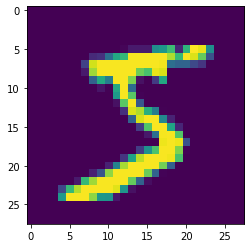

In [5]:
plt.imshow(image_tensor[0, 0:28, 0:28]);

In [6]:
N = 1000
X, y = [], []

for ind in range(N):
    image_tensor, label = mnist[ind]
    X.append(image_tensor.flatten().numpy())
    y.append(label)

X_train, X_test = np.split(np.array(X), [N * 8 // 10])
y_train, y_test = np.split(np.array(y), [N * 8 // 10])

### Параметры

In [7]:
BATCH_SIZE = 4
LEARNING_RATE = 0.1
NUM_EPOCH = 10

### Numpy net

[Источник вдохновения: microsoft - AI-For-Beginners](https://github.com/microsoft/AI-For-Beginners/blob/main/lessons/3-NeuralNetworks/04-OwnFramework/OwnFramework.ipynb)

In [8]:
class Linear:
    def __init__(self, n_in, n_out):
        self.W = np.random.normal(0, 0.05, (n_out, n_in))
        self.dW = np.random.normal(0, 0.05, (n_out, n_in))
        self.b = np.zeros((1, n_out))
        self.db = np.zeros((1, n_out))
        
    def forward(self, x):
        self.x = x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W) 
        self.dW = np.dot(dz.T, self.x)
        self.db = dz.sum(axis=0)
        return dx
    
    def update(self, lr):
        self.W -= lr * self.dW
        self.b -= lr * self.db

In [9]:
class Tanh:
    def forward(self, x):
        y = np.tanh(x)
        self.y = y
        return y

    def backward(self, dy):
        return (1.0 - self.y ** 2) * dy

In [10]:
class Softmax:
    def forward(self, z):
        self.z = z
        zmax = z.max(axis=1, keepdims=True)
        expz = np.exp(z - zmax)
        Z = expz.sum(axis=1, keepdims=True)
        return expz / Z

    def backward(self, dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)

In [11]:
class CrossEntropyLoss:
    def forward(self, p, y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()

    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0 / len(self.y)
        return dlog_softmax / self.p

In [12]:
class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)

In [13]:
def get_metrics(x, y, loss=CrossEntropyLoss()):
    p = net.forward(x)
    loss = loss.forward(p, y)
    pred = np.argmax(p, axis=1)
    accuracy = (pred == y).mean()
    return round(loss, 3), round(accuracy, 3)

In [14]:
net = Net()
net.add(Linear(784, 392))
net.add(Tanh())
net.add(Linear(392, 196))
net.add(Tanh())
net.add(Linear(196, 10))
net.add(Softmax())
loss = CrossEntropyLoss()


for epoch in range(1, NUM_EPOCH + 1):
    for i in range(0, len(X_train), BATCH_SIZE):
        xb = X_train[i : i + BATCH_SIZE]
        yb = y_train[i : i + BATCH_SIZE]

        p = net.forward(xb)
        l = loss.forward(p, yb)
        dp = loss.backward(l)
        dx = net.backward(dp)
        net.update(LEARNING_RATE)
    
    print(f'Epoch: {epoch}')
    print("Train loss = {}, accuracy = {}".format(*get_metrics(X_train, y_train)))
    print("Test loss = {}, accuracy = {}\n".format(*get_metrics(X_test, y_test)))

Epoch: 1
Train loss = 0.407, accuracy = 0.871
Test loss = 0.729, accuracy = 0.8

Epoch: 2
Train loss = 0.241, accuracy = 0.922
Test loss = 0.729, accuracy = 0.79

Epoch: 3
Train loss = 0.145, accuracy = 0.958
Test loss = 0.81, accuracy = 0.815

Epoch: 4
Train loss = 0.138, accuracy = 0.95
Test loss = 0.865, accuracy = 0.825

Epoch: 5
Train loss = 0.086, accuracy = 0.968
Test loss = 0.934, accuracy = 0.83

Epoch: 6
Train loss = 0.057, accuracy = 0.981
Test loss = 0.981, accuracy = 0.805

Epoch: 7
Train loss = 0.019, accuracy = 0.994
Test loss = 0.889, accuracy = 0.855

Epoch: 8
Train loss = 0.004, accuracy = 1.0
Test loss = 0.867, accuracy = 0.86

Epoch: 9
Train loss = 0.003, accuracy = 1.0
Test loss = 0.878, accuracy = 0.865

Epoch: 10
Train loss = 0.002, accuracy = 1.0
Test loss = 0.882, accuracy = 0.87



In [15]:
net.layers[0].W.shape, net.layers[0].b.shape

((392, 784), (1, 392))

In [16]:
net.layers[2].W.shape, net.layers[2].b.shape

((196, 392), (1, 196))

In [17]:
net.layers[4].W.shape, net.layers[4].b.shape

((10, 196), (1, 10))

### Pytorch net

In [18]:
class MyNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(784, 392)
        self.func1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(392, 196)
        self.func2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(196, 10)
        self.func3 = torch.nn.Softmax()

    def forward(self, x):
        x = self.fc1(x)
        x = self.func1(x)
        x = self.fc2(x)
        x = self.func2(x)
        x = self.fc3(x)
        x = self.func3(x)
        return x

In [19]:
def get_metrics_torch(x, y, loss=torch.nn.CrossEntropyLoss()):
    output = net2(torch.from_numpy(x))
    loss = criterion(output, torch.from_numpy(y)).item()
    preds = np.argmax(output.detach().numpy(), axis=1)
    acc = (preds == y).mean()
    return round(loss, 3), round(acc, 3)

In [20]:
net2 = MyNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net2.parameters(), lr=LEARNING_RATE)


for epoch in range(1, NUM_EPOCH + 1):
    for i in range(0, len(X_train), BATCH_SIZE):
        xb = torch.from_numpy(X_train[i : i + BATCH_SIZE])
        yb = torch.from_numpy(y_train[i : i + BATCH_SIZE])

        output = net2(xb)
        loss = criterion(output, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch: {epoch}')
    print("Train loss = {}, accuracy = {}".format(*get_metrics_torch(X_train, y_train)))
    print("Test loss = {}, accuracy = {}\n".format(*get_metrics_torch(X_test, y_test)))

<ipython-input-18-161e89843a4a>:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.func3(x)


Epoch: 1
Train loss = 2.115, accuracy = 0.396
Test loss = 2.133, accuracy = 0.385

Epoch: 2
Train loss = 1.798, accuracy = 0.695
Test loss = 1.815, accuracy = 0.71

Epoch: 3
Train loss = 1.678, accuracy = 0.816
Test loss = 1.738, accuracy = 0.75

Epoch: 4
Train loss = 1.636, accuracy = 0.846
Test loss = 1.715, accuracy = 0.785

Epoch: 5
Train loss = 1.579, accuracy = 0.915
Test loss = 1.67, accuracy = 0.835

Epoch: 6
Train loss = 1.55, accuracy = 0.935
Test loss = 1.639, accuracy = 0.87

Epoch: 7
Train loss = 1.535, accuracy = 0.94
Test loss = 1.631, accuracy = 0.87

Epoch: 8
Train loss = 1.523, accuracy = 0.95
Test loss = 1.624, accuracy = 0.87

Epoch: 9
Train loss = 1.514, accuracy = 0.96
Test loss = 1.62, accuracy = 0.85

Epoch: 10
Train loss = 1.507, accuracy = 0.964
Test loss = 1.619, accuracy = 0.85



In [21]:
net2.fc1.weight.shape, net2.fc1.bias.shape

(torch.Size([392, 784]), torch.Size([392]))

In [22]:
net2.fc2.weight.shape, net2.fc2.bias.shape

(torch.Size([196, 392]), torch.Size([196]))

In [23]:
net2.fc3.weight.shape, net2.fc3.bias.shape

(torch.Size([10, 196]), torch.Size([10]))

In [24]:
pytorch_total_params = sum(p.numel() for p in net2.parameters() if p.requires_grad)
pytorch_total_params

386718

In [25]:
784 * 392 + 392 + 392 * 196 + 196 + 196 * 10 + 10

386718